# Elliptic Curves over Finite Fields

In [1]:
from finite_field import FiniteFieldElement
from ec import EllipticCurve, ECPoint
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')

## Introduction

Elliptic Curve Cryptography relies on elliptic curves over finite fields.<br><br> 
Previously, we showed what elliptic curves over real numbers look like and how they behave. As it turns out, point addition actually works over any field and we can use it over a finite field and the logic remains the same.<br><br>
The mathematical operations for addition and multiplication work as defined for the finite field elements, i.e. using modular arithmetic. The logic for point addition still remains the same (as this is a different operation, the binary operation specifically defined for elliptic curves).

## Visualising elliptic curves over finite fields

Because we only allow finite field elements (which are represented as integer numbers) we don't obtain a smooth curve.

Similar to the elliptic curve over reals we get at most two y-values for every x-value that is on the curve. For an elliptic curve of the form $y^2 = x^3 + 8$ over a finite field of order $127$, we get the following plot:

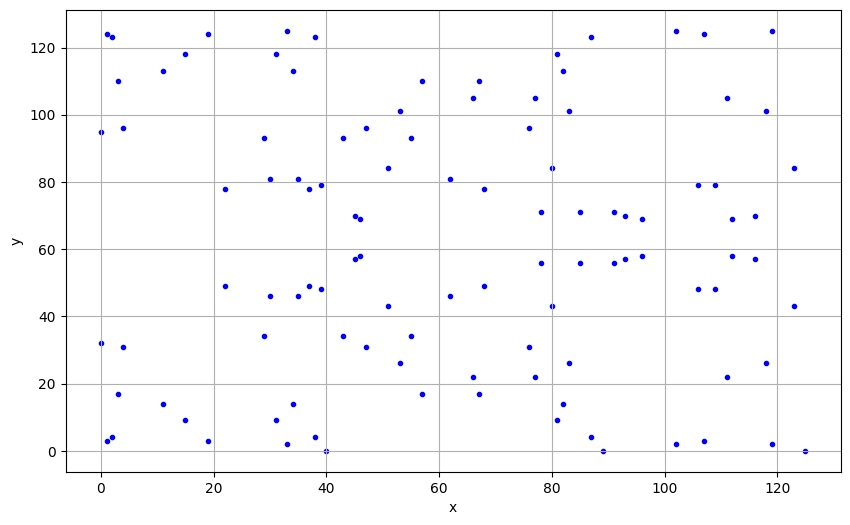

In [2]:
p = 127
a = FiniteFieldElement(0, p)
b = FiniteFieldElement(8, p)
curve = EllipticCurve(a, b)
curve.plot_curve_over_field()

#### The Python class automatically handles this

Note that the way the Python classes are set up this automatically works, i.e. we can initiate $a$ and $b$ as finite field elements and feed them into the curve to get a curve over a finite field. We can then initiate a point on the curve by providing an x- and a y-coordinate as finite field elements of the same field order:

In [3]:
x = FiniteFieldElement(2, p)
y = FiniteFieldElement(123, p)
point = ECPoint(x, y, curve)
print(point)

ECPoint(2, 123)_on_EllipticCurve(a=0, b=8)


#### Same curve, different field order

The higher the field order (and therefore the modulo), the more points an elliptic curve of the same form holds:

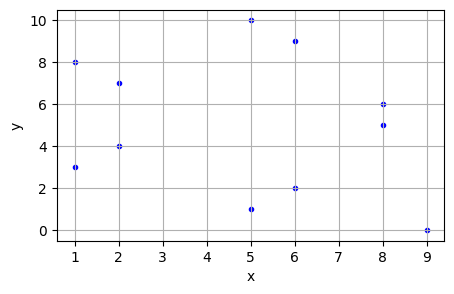

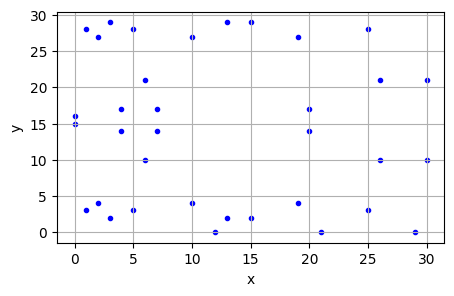

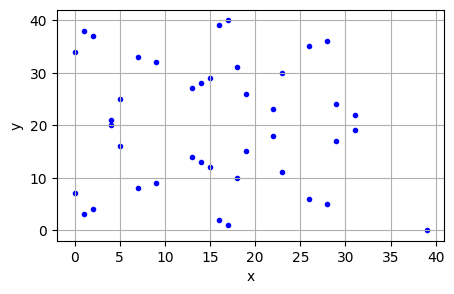

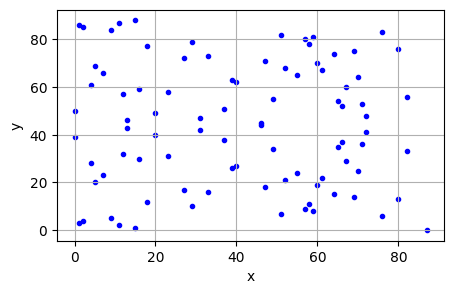

In [4]:
a = 0
b = 8
for p in [11, 31, 41, 89]:
    a_f = FiniteFieldElement(a, p)
    b_f = FiniteFieldElement(b, p)
    curve = EllipticCurve(a_f, b_f)
    curve.plot_curve_over_field(figsize=(5, 3))

The range of x- and y-values that lie on the "curve" are bound to be between $0$ and $p-1$. This is because everything is done modulo $p$.

This means that any x- or y-value that is greater than or equal to $p$ in terms of real numbers gets wrapped around to be within the range $0$ to $p-1$.<br><br>
There's also a symmetry about $y = p/2$. Intuitively this makes sense because there are two y-values that satisfy the elliptic curve equation. In the case of an elliptic curve over real numbers the symmetry was abut $y = 0$ but in a finite field we are bound to integer values that are greater than or equal to zero. Because the set of possible y-values ranges from $0$ to $p-1$ the mirroring axis should lie in the middle of these possible values, which is $p/2$.

Because we don't have negative numebrs in finite fields but we have modular arithmetic, the symmetric counterpart (the inverse) for any y-value is $p-y$, which results in the following relationships:
 - If $y$ is below $p/2$, then the counterpart $p-y$ is above $p/2$.
 - If $y$ is above $p/2$, then the counterpart $p-y$ is below $p/2$.

### Connection to points on the elliptic curve over real numbers

Looking at the elliptic curve $y^2 = x^3 + 8$ over a finite field of order $11$, we get the following scatter plot:

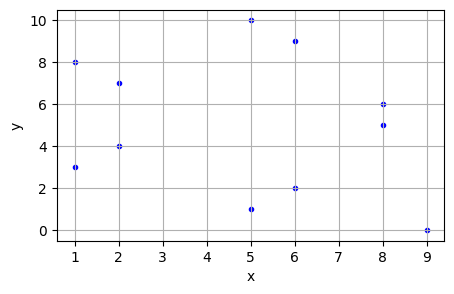

In [5]:
a = 0
b = 8
p = 11
a_f = FiniteFieldElement(a, p)
b_f = FiniteFieldElement(b, p)
curve = EllipticCurve(a_f, b_f)
curve.plot_curve_over_field(figsize=(5, 3))

We can actually map some of the above points to points on the same elliptic curve over real numbers. <br><br>
The point $(1, 3)$, for example, exists on both curves. The same is true for $(2, 4)$ and for the inverses of both points:

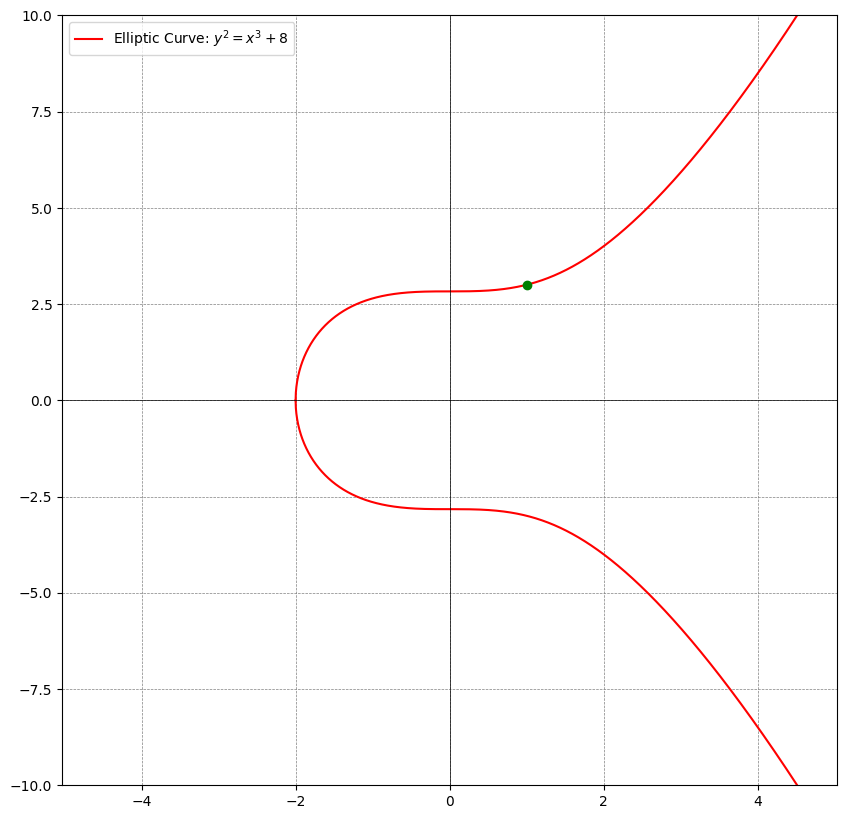

In [6]:
a = 0
b = 8
curve = EllipticCurve(a, b)
point = ECPoint(1, 3, curve)
curve.plot_curve(x_min=-3, x_max=30, lims=(5, 10), point=point)

This is obvious for the above points because both x- and y-coordinates are less than $p$. But we can even map the point $(46, 312)$, which is on the curve over real numbers, as well as its inverse onto the finite field elements:

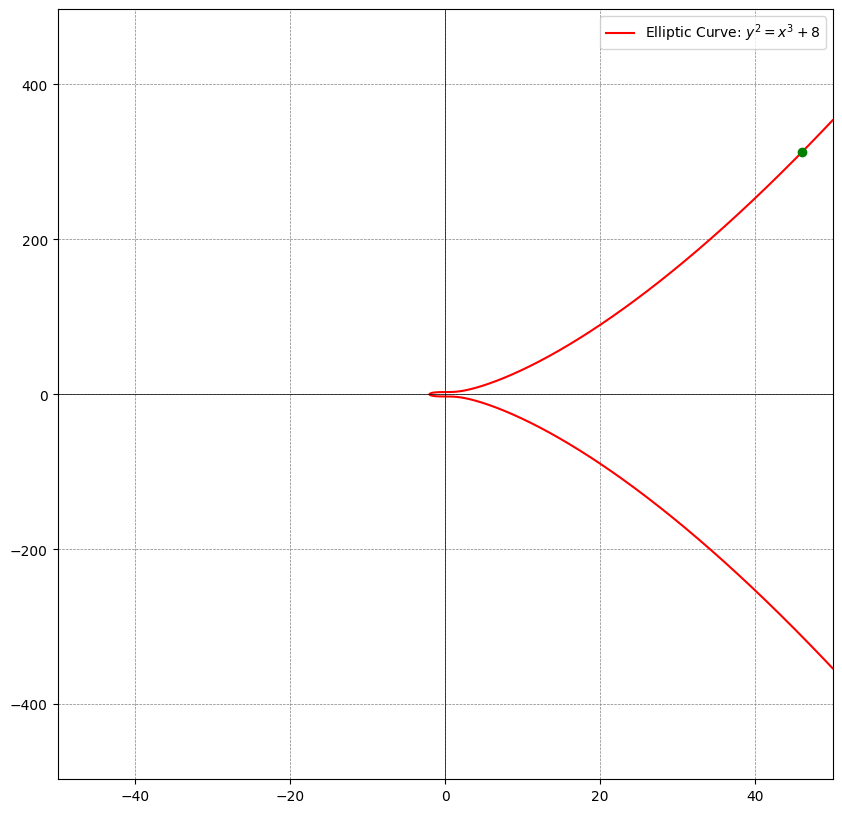

In [7]:
a = 0
b = 8
curve = EllipticCurve(a, b)
point = ECPoint(46,  312, curve)
curve.plot_curve(x_min=-3, x_max=50, lims=(50, 500), point=point)

This is because 46 is congruent to 2 and 312 is congruent to 4 modulo 11:

In [8]:
print(f'The point {(point.x, point.y)} over real numbers maps to the point ({point.x % p, point.y % p}) over the finite field of order {p}')

The point (46, 312) over real numbers maps to the point ((2, 4)) over the finite field of order 11


## Point addition over a finite field

Visually, an elliptic curve over a finite field looks nothing like the elliptic curves we saw over real numbers but what's amazing is that all the properties and formulas of the "original" elliptic curves still work. Most importantly, point addition still works and has a similar intuition.<br><br>
Over a finite field, when you add two points, $A$ and $B$, which are not the same, then you still get the result of the addition by finding the third point that is intersected by a straight line through $A$ and $B$ and reflecting the point. This time you don't reflect the point over the x-axis, because we are operatng over a finite field and negative numbers aren't allowed. This time you flip over the "mirroring axis" at $p/2$. Because we are operating over a finite field, the straight line that connects these points wraps around at the edges, which are defined to be $0$ and $p-1$ for both the x- and y-axis.<br><br>
For the elliptic curve $y^2 = x^3 + 8$ over a finite field of order $19$, when we add the point $(7, 3)(A)$ to the point $(11, 16)(B)$ we get the point $(8, 8)(A+B)$. The point where the line connecting $A$ and $B$ intersects the "curve" a third time is the point $(8, 11)(C)$. This is the inverse of the point A+B and we can see that the x-coordinate is the same and the y-coordinate is $p-y_{A+B}$.

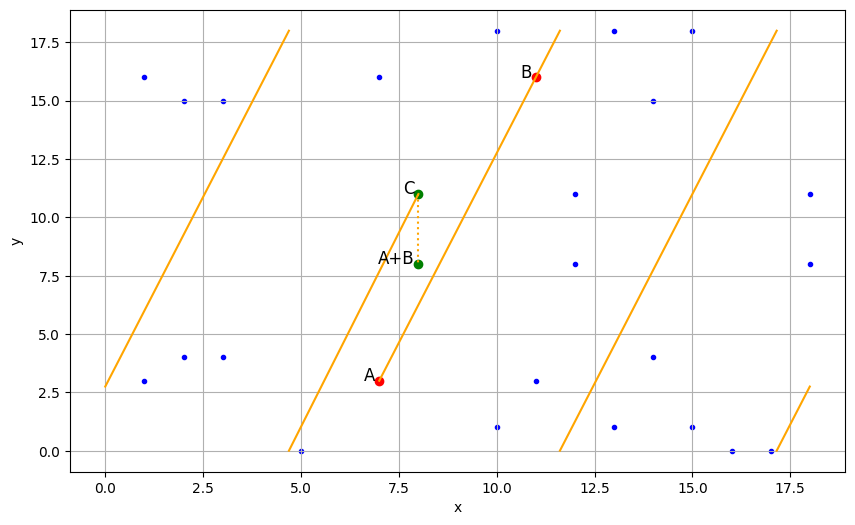

In [9]:
p = 19
a = FiniteFieldElement(0, p)
b = FiniteFieldElement(8, p)
curve = EllipticCurve(a, b)

x1 = FiniteFieldElement(7, p)
y1 = FiniteFieldElement(3, p)
x2 = FiniteFieldElement(11, p)
y2 = FiniteFieldElement(16, p)
p1 = ECPoint(x1, y1, curve)
p2 = ECPoint(x2, y2, curve)

curve.plot_point_addition_over_field(p1, p2)

### Adding a point to itself

Similar to the logic for elliptic curves over real numbers, when adding a point to itself the slope of the straight line we are interested in is the slope of the tangent line at that point. If we add a point $P$ to itself over the same elliptic curve as we used above we get the following result:

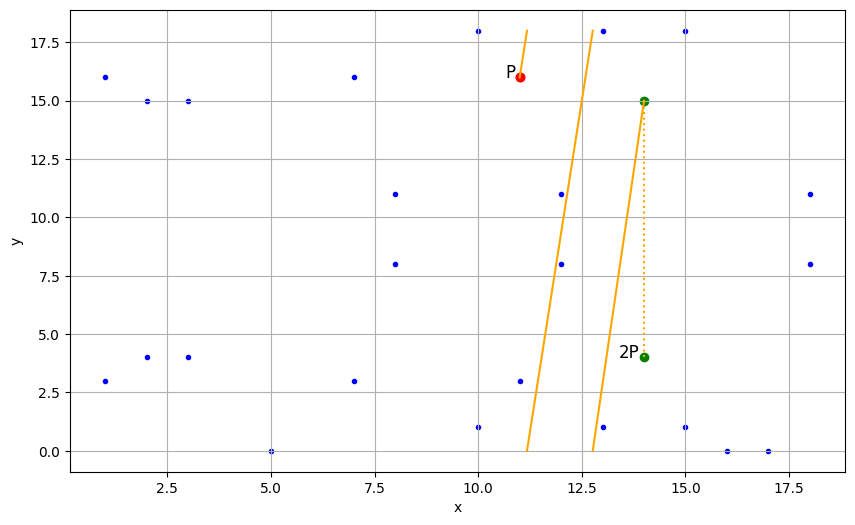

In [10]:
x2 = FiniteFieldElement(11, p)
y2 = FiniteFieldElement(16, p)
P = ECPoint(x2, y2, curve)
curve.plot_point_addition_over_field(P, P, max_wraps=3)

## Point multiplication over finite fields

Similarly to how we could add a point to itself any number of times for elliptic curves over real numbers we can do the same for points on an elliptic curve over finite fields. Using the same point $P$ with the coordinates $(11, 16)$ that we used above we can "point multiply" the point to itself many times. The below plot shows all the points we end up with and how many times we  point multiplied the point $(1 = P, 2 = P + P, 3 = P + P + P, ...)$:

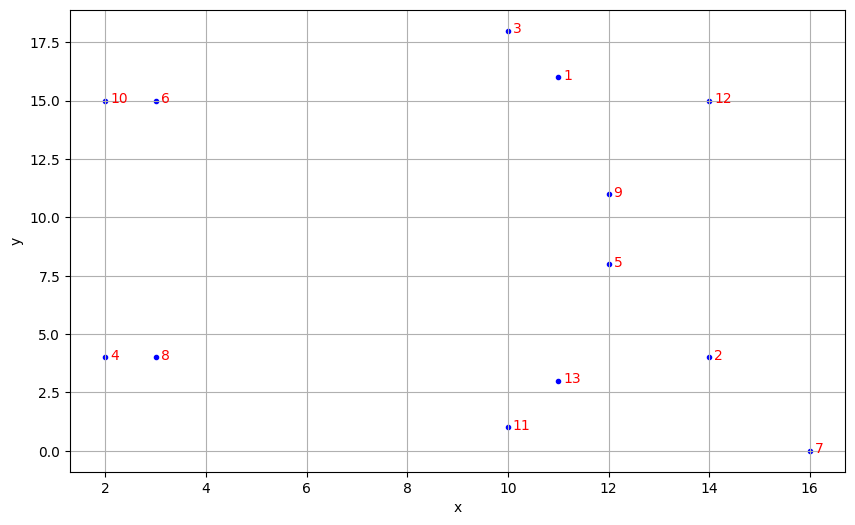

In [11]:
curve.plot_cyclic_subgroup(generator=P)

### Every point has its own order

What if we want to add the point $P$ to itself more than $13$ times?

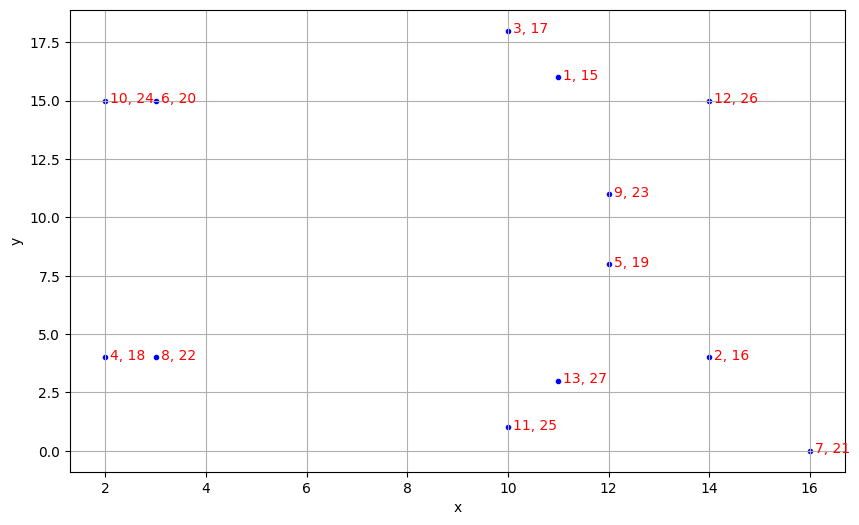

In [12]:
curve.plot_cyclic_subgroup(generator=P, max_loops=2)

Note that the points we end up with are still all the same but now we labelled them with two values. Both of these are valid numbers for how many times we point multiplied the point, i.e. they are all valid values for $nP$.<br><br>
Two important observations:
- There is no $n=14$ in the labels.
- All the labels have a number $n$ and then another number $n+14$.

This is due to the fact that each point on the elliptic curve over a finite field has an order. The order of a point P on the curve is defined as the samllest integer, $n$ such that $nP = O$ (where $O$ is the point at infinity). In the example above, the point $P$ therefore has the order $14$. The set of points we can generate using the point $P$ is called a cyclic subgroup of the group of points on the curve.<br><br>

If we choose another point on the curve, $(2,15)$, for example, we get the following cyclical subgrouo:

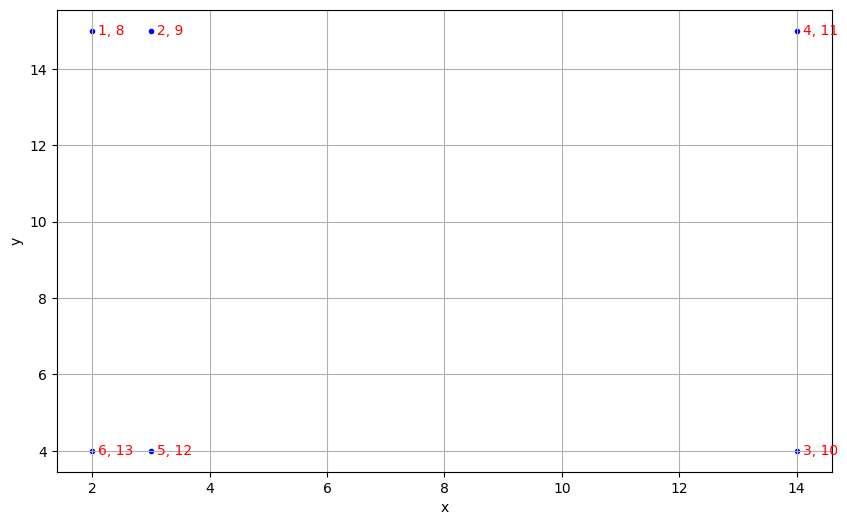

In [14]:
x2 = FiniteFieldElement(2, p)
y2 = FiniteFieldElement(15, p)
P = ECPoint(x2, y2, curve)
curve.plot_cyclic_subgroup(generator=P, max_loops=2)

The above plots demonstrate what happens when we point multiply points on an elliptic curve that have an order that is less than the order of the group of all points on the curve: the point multiplication results in a subgroup of points, often with way less points than all possible points on the curve. This often happens when the order of the group of all points is not prime (In the above example the full group has order 27).<br><br>
In elliptic curve cryptography we need what's called a "generator" point. This is a point which can generate all or almost all other points on the curve, which is only the case if the point has an order that is the same or very close to the order that the entire group of points on the elliptic curve has. <br><br>
The reason why we need such a generator point will become clear once we talk about public and private keys.

## Elliptic curves over finite fields with prime order

Let's look at the elliptic curve $y^2 = x ^3 + 28x + 1$ over the finite field $F_{29}$:

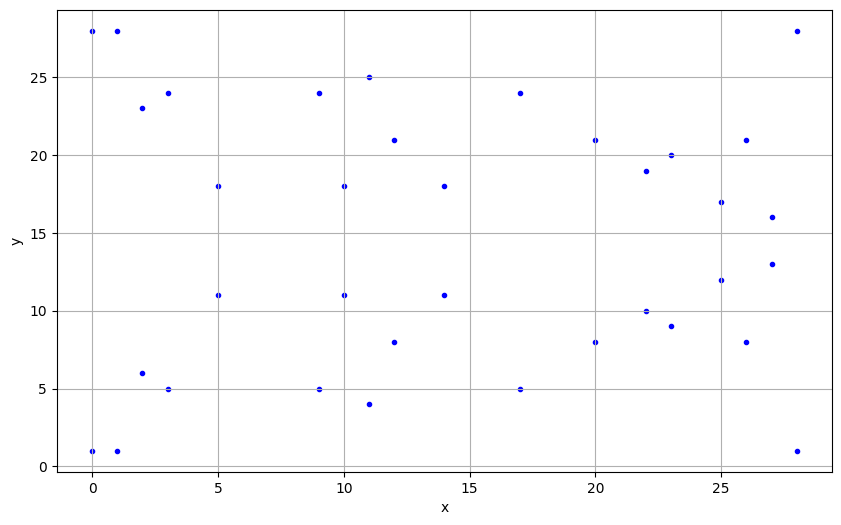

In [15]:
p = 29
a = FiniteFieldElement(28, p)
b = FiniteFieldElement(1, p)
curve = EllipticCurve(a, b)
curve.plot_curve_over_field()

Interestingly, the above curve is equivalent to the elliptic curve $y^2 = x ^3 - x + 1$ over the finite field $F_{29}$. The reason for this is that in $F_{29}$, $a=-1$ is congruent to $a=28$ because $-1 \% 29 ≡ 28 \% 29$. The below plot shows this:

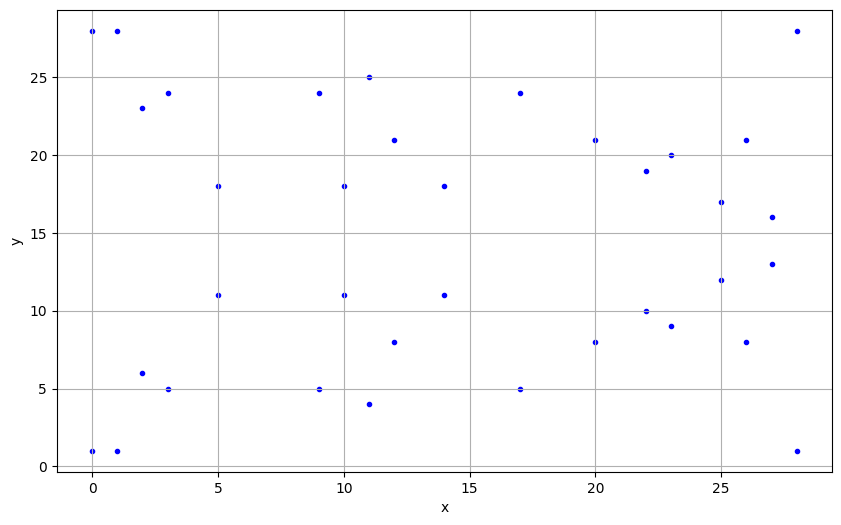

In [16]:
p = 29
a = FiniteFieldElement(-1 % p, p)
b = FiniteFieldElement(1, p)
curve = EllipticCurve(a, b)
curve.plot_curve_over_field()

Let's pick one of the points, $(5, 18)$, and see whether it is a valid generator point:

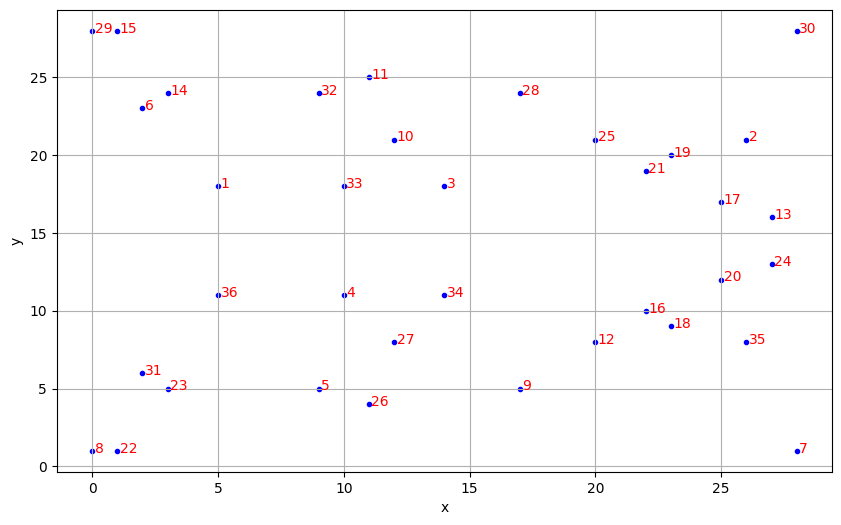

In [17]:
x = FiniteFieldElement(5, p)
y = FiniteFieldElement(18, p)
P = ECPoint(x, y, curve)
curve.plot_cyclic_subgroup(generator=P)

We can see that the point $(5, 18)$ is a valid generator point because we can generate all other points on the elliptic curve by adding that point to itself repeatedy. The order of the generator point is 37, which is also the order of the full group and is a prime number. In fact, any non-identity point (points that aren't the point at infinity) could be used as a generator point in this case because all of them are able to represent all other points through point multiplication.

Using the point $(12, 21)$ also works:

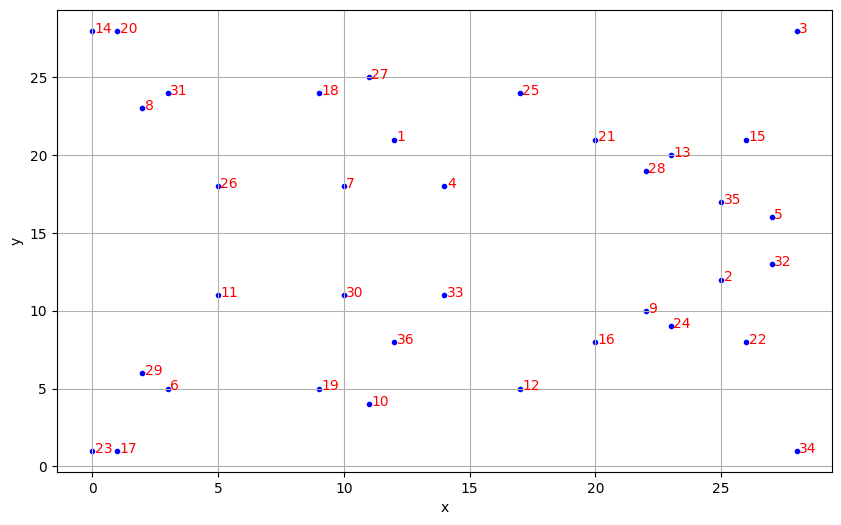

In [18]:
x = FiniteFieldElement(12, p)
y = FiniteFieldElement(21, p)
P = ECPoint(x, y, curve)
curve.plot_cyclic_subgroup(generator=P)

If we add $P$ to itself more than its order, $n$, times, we get the cyclical group pattern again:

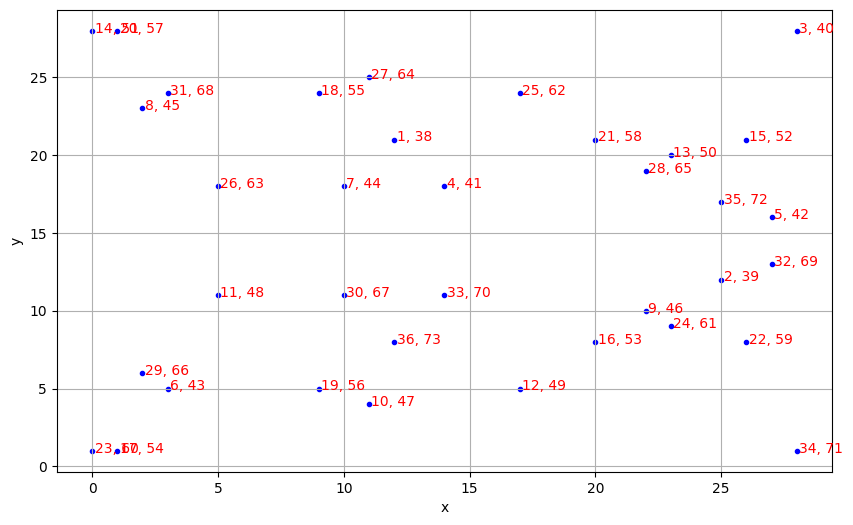

In [19]:
curve.plot_cyclic_subgroup(generator=P, max_loops=2)

One of the key reasons why we need an elliptic curve over a finite field with a full group order, $N$, that is prime as well as a generator point, $P$, with a prime order, $p$, that is close to $N$ is that in this case we have the following: <br><br>
For any integer $k$ in the range $[1, p-1]$, $kP$ will be a unique point. This means that as long as $k$ is smaller than the generator order, point multiplying the generator point by that $k$ will lead to a point on the curve that is unique and therefore there is a one-to-one mapping between valid integers $k$ and resulting point $kP$. If $k$ was allowed to be greater than $p$, this one-to-one relationship wouldn't hold anymore because of the cyclical nature of the group.<br><br>
Furthermore, point multiplication distributes points uniformly over the elliptic curve. This means that for a large enough elliptic curve group, the resulting point $Q = kP$ appears random and uniformly distributed. This makes it impossible for an attacker to predict where a given integer, $k$ will map the generator point, $P$. <br><br>
For elliptic curve cryptography, especially the creation of private and public keys these properties are of extreme importance. We will dive further into this when we look at Bitcoin's elliptic curve as well as private and public keys.

## Elliptic Curve Discrete Logarithm Problem (ECDLP)

Looking at the above plots it becomes clear that there isn't really a predictable pattern of point multiplication of the generator point where the integer multiplier $k$ is less than the group order $N$. The points seem to jump around almost randomly and if the labels of how many times a point was "multiplied" were removed there would be no way for anyone to say how often the generator point was multiplied to get to any of the other points without looping over every integer starting from $1$ until they reached that point.<br><br>
This is the essence of the ECDLP, which states:<br><br> 

Given a point $P$ and a multiple of it $Q=kP$ , where $k$ is a secret integer, the challenge is to find $k$. Despite knowing both $P$ and $Q$, computng $k$ is computationally infeasible for large $k$. This is what makes elliptic curve cryptography secure.

## Why use elliptic curves over finite fields and not over real numbers

One might wonder why we use elliptic curves over finite fields and not over real numbers. What's the added benefit of this? The key reasons are the following:
1. **Discrete and Predictable**: Over real numbers, operations like point addition and multiplication can lead to points with coordinates that are irrational or require infinite precision to represent accurately. This complicates the computation and storage of points.
2. **Efficiency of Computations**:Computations in finite fields are much more efficient. Operations like addition, multiplication, and especially division (inversion) in finite fields can be performed using modular arithmetic, which is computationally less intensive than dealing with the continuous and potentially infinite precision of real numbers. This efficiency is crucial for systems like Bitcoin where speed in transaction verification is important.
3. **Security**: For finite fields , the size of the field (the number of elements) directly influences the security level (larger size = more brute force iterations).
4. **Uniform Distribution**: The finite field structure ensures that points generated by point multiplication are uniformly distributed across the curve, contributing to the security of ECC.
5. **Deterministic Operations**: Using finite fields makes the operations on elliptic curves deterministic and repeatable, which is crucial for cryptographic protocols.<br><br>

Regarding the first point above: An important reason for why we don't use elliptic curves over real numbers (which include floating-point numbers) for elliptic curve cryptography has to do with how most programming languages represent floating-point numbers. Usually, floating-point numbers are represented using a finite number of bits, which can lead to rounding errors. In Python, if we take the square root of a number that doesn't have a "perfect" square root and square the result again, we don't get the original number back exactly, as can been here:

In [20]:
num = 8
print(f'Square root of {num}: {math.sqrt(num)}')
print(f'Square of {math.sqrt(num)}: {math.sqrt(num) ** 2}')

Square root of 8: 2.8284271247461903
Square of 2.8284271247461903: 8.000000000000002


Operations like these on real numbers are not as precise as operations on integers (over finite field elements), leading to potential inaccuracies in the computed points.  Even the same operation might produce slightly different results depending on the order of operations or the specific implementation, which is unacceptable in cryptography, where exact repeatability is crucial. Any inconsistencies or inaccuracies in calculations could introduce predictability into the cryptographic process, potentially making it easier for an attacker to guess or derive private keys.

## Summary

We now have an understanding of:
- What elliptic curves over finite fields look like and how they behave.
- Point addition over finite field elements and that the math still works the same.
- Point multiplication over finite fields and why it forms cyclic groups or cyclic subgroups.
- What a generator point is and what it's role in elliptic curve cryptography (ECC) is.
- What the Elliptic Curve Discrete Logarithm Problem (ECDLP) is and why it makes ECC so secure.
- Why ECC is done over finite field elements and not real numbers.